<a href="https://colab.research.google.com/github/Elfeny7/ComputerVision_Learn/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ikmal Faris Musyaffa / 12 / 3B / 2141720123**

# **No 2**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [6]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

In [7]:
img_m = cv.imread('female.tiff')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_m, cv.COLOR_BGR2GRAY)

# **No 3**

## **Sharpen**

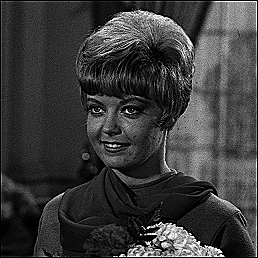

In [8]:
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

## **Emboss**

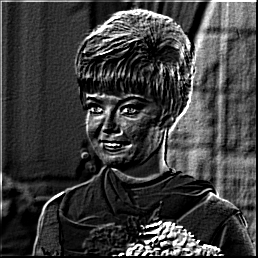

In [9]:
kernel_embos = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, kernel_embos, 1, 2))

## **Left Sobel Edge Detection**

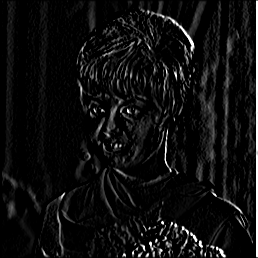

In [10]:
kernel_sobel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

## **Canny Edge Detection (Laplacian)**

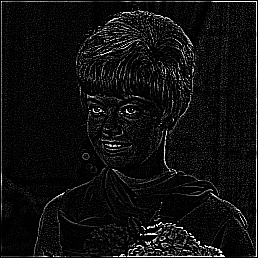

In [11]:
kernel_edge = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, kernel_edge, 1, 2))

## **Canny Edge Detection (Library)**

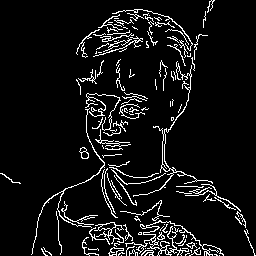

In [12]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('female.tiff')

edges = cv2.Canny(img, 100, 200, 3, L2gradient=True)

cv2_imshow(edges)

## **Prewitt Edge Detection**

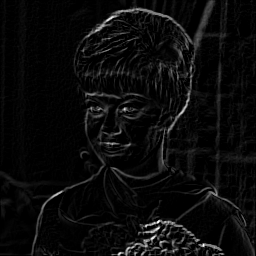

In [13]:
#Prewitt Edge Detection
kernel_prewitt_vertical = np.array([[-1, 0, 1],
                                    [-1, 0, 1],
                                    [-1, 0, 1]])

kernel_prewitt_horizontal = np.array([[-1, -1, -1],
                                      [0, 0, 0],
                                      [1, 1, 1]])

result_vertical = cv.filter2D(img_gray, -1, kernel_prewitt_vertical)
result_horizontal = cv.filter2D(img_gray, -1, kernel_prewitt_horizontal)
result_combined = np.sqrt(result_vertical**2 + result_horizontal**2).astype(np.uint8)

# Fungsi untuk mengaplikasikan filter Prewitt
def prewitt_edge_detection(image):
    # Konversi gambar ke grayscale jika belum
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Kernel Prewitt untuk deteksi tepi vertikal dan horizontal
    kernel_vertical = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_horizontal = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    # Konvolusi dengan kernel Prewitt
    vertical_edges = cv2.filter2D(image, -1, kernel_vertical)
    horizontal_edges = cv2.filter2D(image, -1, kernel_horizontal)

    # Kombinasi hasil deteksi tepi vertikal dan horizontal
    combined_edges = cv2.addWeighted(vertical_edges, 0.5, horizontal_edges, 0.5, 0)

    return combined_edges

# Baca gambar
image = cv2.imread('female.tiff')

# Aplikasikan filter Prewitt Edge Detection
prewitt_result = prewitt_edge_detection(image)

# Tampilkan gambar hasil
cv2_imshow(prewitt_result)
cv2.waitKey(0)
cv2.destroyAllWindows()


## **Prewitt Edge Detection (Manual)**

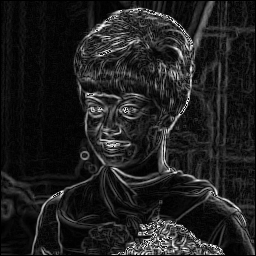

In [14]:
import cv2
import numpy as np

# Fungsi untuk mengaplikasikan filter Prewitt secara manual
def prewitt_edge_detection(image):
    # Konversi gambar ke grayscale jika belum
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Kernel Prewitt untuk deteksi tepi vertikal dan horizontal
    kernel_vertical = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_horizontal = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    # Ukuran gambar
    height, width = image.shape

    # Buat gambar hasil dengan ukuran yang sama
    result = np.zeros((height, width), dtype=np.uint8)

    # Aplikasikan filter Prewitt secara manual
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            # Hitung gradien vertikal dan horizontal
            vertical_gradient = np.sum(image[y-1:y+2, x-1:x+2] * kernel_vertical)
            horizontal_gradient = np.sum(image[y-1:y+2, x-1:x+2] * kernel_horizontal)

            # Hitung besaran gradien
            gradient_magnitude = int(np.sqrt(vertical_gradient**2 + horizontal_gradient**2))

            # Ambil nilai hasil
            result[y, x] = gradient_magnitude

    return result

# Baca gambar
image = cv2.imread('female.tiff')

# Aplikasikan filter Prewitt Edge Detection secara manual
prewitt_result = prewitt_edge_detection(image)

# Tampilkan gambar hasil
cv2_imshow(prewitt_result)
cv2.waitKey(0)
cv2.destroyAllWindows()


## **5x5 Gaussian Blur**

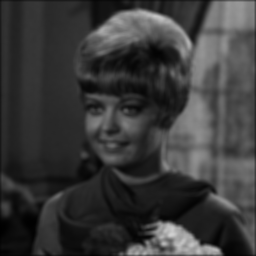

In [15]:
#5x5 Gaussian Blur
kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

## **21x21 Gaussian Blur**

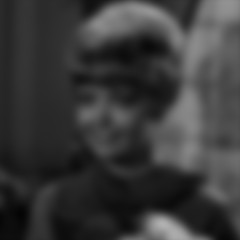

In [16]:
#21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))